In [1]:
import os

# Scientific and vector computation for python
import numpy as np

# Import regular expressions to process emails
import re

# Plotting library
from matplotlib import pyplot

# Optimization module in scipy
from scipy import optimize

# will be used to load MATLAB mat datafile format
from scipy.io import loadmat
from sklearn.svm import SVC
import scipy as sp

In [2]:
data =loadmat(os.path.join('ex6data1.mat'))
data.keys()

['y', 'X', '__version__', '__header__', '__globals__']

In [3]:
X = data['X']
y = data['y']
print(X.shape)
print(y.shape)

(51, 2)
(51, 1)


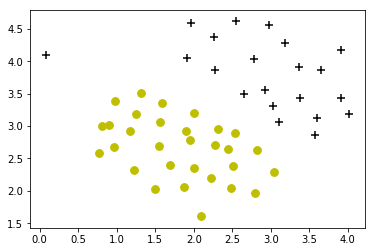

In [4]:
def plotdata(X,y):
    positive = (y==1).flatten() # flatout the array
    negative = (y==0).flatten()
    pyplot.scatter(X[positive,0],X[positive,1],s=60, c='k', marker='+', linewidths=1)
    pyplot.scatter(X[negative,0],X[negative,1],s=60, c='y', marker='o', linewidths=1)
plotdata(X,y)

NameError: global name 'plotData' is not defined

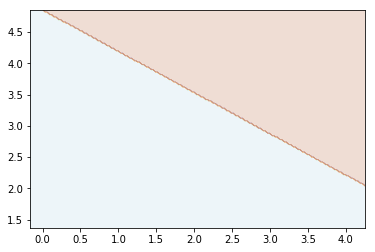

In [5]:

def plot_svc(svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    pyplot.contourf(xx, yy, Z, cmap=pyplot.cm.Paired, alpha=0.2)

    plotData(X, y)
    #plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
    # Support vectors indicated in plot by vertical lines
    sv = svc.support_vectors_
    pyplot.scatter(sv[:,0], sv[:,1], c='k', marker='|', s=100, linewidths='1')
    pyplot.xlim(x_min, x_max)
    pyplot.ylim(y_min, y_max)
    pyplot.xlabel('X1')
    pyplot.ylabel('X2')
    pyplot.show()
    print('Number of support vectors: ', svc.support_.size)
    
clf = SVC(C=1.0, kernel='linear')
clf.fit(X, y.ravel())
plot_svc(clf, X, y)   

### SVM with Gaussian Kernels

In [ ]:
def gaussianKernel(x1, x2, sigma=2):
    norm = np.dot((x1-x2).T,(x1-x2))
    # return np.linalg.norm(x1-x2)/(2*sigma**2)
    return np.exp(-norm/(2*sigma**2))

In [46]:
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2

gaussianKernel(x1, x2, sigma)

0.1353352832366127

In [50]:
data2 = loadmat(os.path.join('ex6data2.mat'))
data2.keys()

['y', 'X', '__version__', '__header__', '__globals__']

In [52]:
X2 = data2['X']
y2 = data2['y']
print('X2:', X2.shape)
print('y2:', y2.shape)

('X2:', (863, 2))
('y2:', (863, 1))


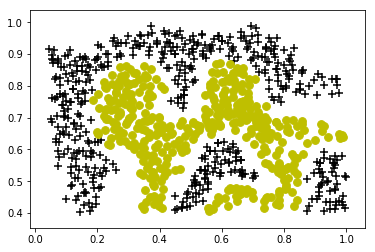

In [53]:
plotData(X2,y2)

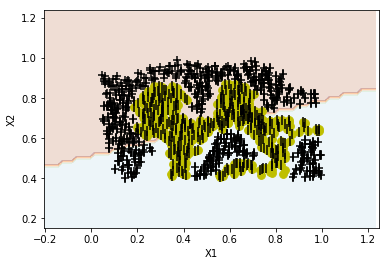

('Number of support vectors: ', 754)


In [54]:
clf = SVC(C=1.0, kernel='linear')
clf.fit(X2, y2.ravel())
plot_svc(clf, X2, y2)

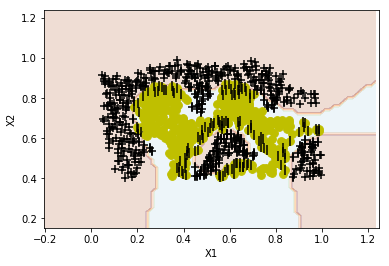

('Number of support vectors: ', 254)


In [56]:
clf2 = SVC(C=50, kernel='rbf', gamma=6)
clf2.fit(X2, y2.ravel())
plot_svc(clf2, X2, y2)

In [59]:
data3 = loadmat(os.path.join('ex6data3.mat'))
data3.keys()

['yval', '__header__', '__globals__', 'Xval', 'y', 'X', '__version__']

In [60]:
y3 = data3['y']
X3 = data3['X']

print('X3:', X3.shape)
print('y3:', y3.shape)

('X3:', (211, 2))
('y3:', (211, 1))


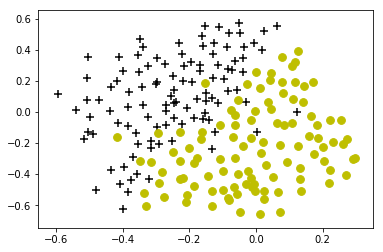

In [61]:
plotData(X3, y3)

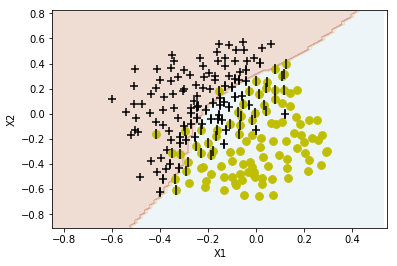

('Number of support vectors: ', 78)


In [62]:
clf3 = SVC(C=1.0, kernel='poly', degree=3, gamma=10)
clf3.fit(X3, y3.ravel())
plot_svc(clf3, X3, y3)

# Spam classification

In [73]:
vocab_list = sp.loadtxt('vocab.txt', dtype='str')
vocab_index_dict = {row[1]: int(row[0]) for row in vocab_list}
index_vocab_dict = {int(row[0]): row[1] for row in vocab_list}

In [77]:
spam_train = os.path.join('spamTrain.mat')
spam_test = os.path.join('spamTest.mat')

In [91]:
with open('emailSample1.txt') as f:
    email_contents_1 = f.read()

In [92]:
email_contents_1

"> Anyone knows how much it costs to host a web portal ?\n>\nWell, it depends on how many visitors you're expecting.\nThis can be anywhere from less than 10 bucks a month to a couple of $100. \nYou should checkout http://www.rackspace.com/ or perhaps Amazon EC2 \nif youre running something big..\n\nTo unsubscribe yourself from this mailing list, send an email to:\ngroupname-unsubscribe@egroups.com\n\n"

In [86]:
!pip install ntlk

  Could not find a version that satisfies the requirement ntlk (from versions: )
No matching distribution found for ntlk


In [93]:
import nltk
from nltk import word_tokenize
stemmer = nltk.PorterStemmer()

def process_email(email_contents, verbose=True):
    
    word_indices = []
    
    # Add code to strip headers here?
    
    email_contents = email_contents.lower()
    
    # Strip all HTML
    email_contents = re.sub(r'<[^<>]+>', ' ', email_contents)
    
    # Handle Numbers
    email_contents = re.sub(r'[0-9]+', 'number', email_contents)
    
    # Handle URLS
    email_contents = re.sub(r'(http|https)://[^\s]*', 'httpaddr', email_contents)
    
    # Handle Email Addresses
    email_contents = re.sub(r'[^\s]+@[^\s]+', 'emailaddr', email_contents)
    
    # Handle $ sign
    email_contents = re.sub(r'[$]+', 'dollar', email_contents)
    
    # Handle punctuation and special ascii characters
    email_contents = re.sub(r'[@$/\\#,-:&*+=\[\]?!(){}\'\">_<;%]+', '', 
                            email_contents)    
    
    # Tokenize
    word_list = word_tokenize(email_contents)

    for i, word in enumerate(word_list):
        # Remove punctuation and non-alphanumeric characters.
        word = re.sub(r'[^a-zA-Z0-9]', '', word)
        
        # If remaining word length is zero, continue.
        if len(word) < 1:
            continue
            
        # Stem 
        try:
            word = stemmer.stem(word)
        except:
            continue
            
        if verbose == True:           
            print word,
            if (i+1) % 13 == 0: print '\r'
            
        try:
            word_indices.append(vocab_dict[word])
        except:
            continue

    if verbose == True: print ""
    
    return word_indices

In [95]:

for i in [1, 2, 3, 86, 916, 1898, 1899]:
    print i, index_vocab_dict[i]
    if i in [3, 86, 916]:
        print '...'

1 aa
2 ab
3 abil
...
86 anyon
...
916 know
...
1898 zero
1899 zip


In [97]:
 
def email_features(word_indices):
    features = sp.zeros(len(index_vocab_dict.keys()))
    for index in word_indices:
        features[index - 1] = 1
    return features